# ВВЕДЕНИЕ В ВЫСШУЮ МАТЕМАТИКУ
****************

## Практическое задание к `Уроку 3`

In [122]:
import numpy as np
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,arcsin,cos,arccos,tan,sqrt,exp)
import matplotlib.pyplot as plt
import math
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from scipy.optimize import fsolve
%matplotlib inline

### Задание 1
Чему равны синус, косинус, тангенс перечисленных углов

In [123]:
df = pd.DataFrame([30,45,60,90,180], columns=['Угол, град.'])
df['sin'] = [sin(pi/6),sin(pi/4),sin(pi/3),sin(pi/2),sin(pi)]
df['cos'] = [cos(pi/6),cos(pi/4),cos(pi/3),cos(pi/2),cos(pi)]
df['tan'] = [tan(pi/6),tan(pi/4),tan(pi/3),tan(pi/2),tan(pi)]
df

,"Угол, град.",sin,cos,tan
0,30,5.000000e-01,8.660254e-01,5.773503e-01
1,45,7.071068e-01,7.071068e-01,1.000000e+00
2,60,8.660254e-01,5.000000e-01,1.732051e+00
3,90,1.000000e+00,6.123234e-17,1.633124e+16
4,180,1.224647e-16,-1.000000e+00,-1.224647e-16


Значения получены с учетом программной погрешности

In [124]:
def toFixed(numObj, digits=2):
    return f"{numObj:.{digits}}"
              
for item in df['sin']:
    df.loc[df['sin']==item,'sin']=toFixed(item)
for item in df['cos']:
    df.loc[df['cos']==item,'cos']=toFixed(item)
for item in df['tan']:
    df.loc[df['tan']==item,'tan']=toFixed(item)              
df

,"Угол, град.",sin,cos,tan
0,30,0.5,0.87,0.58
1,45,0.71,0.71,1.0
2,60,0.87,0.5,1.7
3,90,1.0,6.1e-17,1.6e+16
4,180,1.2e-16,-1.0,-1.2e-16


### Задание 2
Нарисуйте график функции: 

$y = k \cdot cos(x-a)+b$

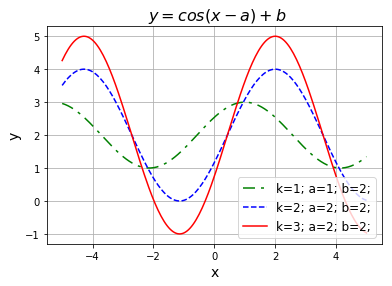

In [39]:
x = np.linspace(-5, 5, 201)
k = [1,2,3]
a = [1,2,2]
b = [2,2,2]

plt.plot(x, k[0]*cos(x-a[0])+b[0], 'g--', dashes=[8,4,2,4],label=r'k=1; a=1; b=2;')
plt.plot(x, k[1]*cos(x-a[1])+b[1], 'b--',label=r'k=2; a=2; b=2;')
plt.plot(x, k[2]*cos(x-a[2])+b[2], 'r',label=r'k=3; a=2; b=2;')
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.title(r'$\ y=cos(x-a)+b$',fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

### Задание 3
- 1 Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.

Преобразование координат

$X=(x-a)\cdot cos \alpha +(y-b)\cdot sin \alpha$

$Y=-(x-a)\cdot sin \alpha +(y-b)\cdot cos \alpha$

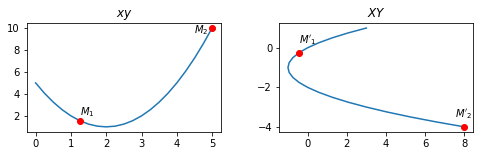

In [40]:
x = np.linspace(0,5,21)
y = (x-2)**2 + 1

a=1
b=2
s = pi/2

X = (x-a)*cos(s) + (y-b)*sin(s)
Y = -(x-a)*sin(s) + (y-b)*cos(s)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x, y)
ax1.plot(x[5], y[5], 'ro')
ax1.annotate('$M_1$', xy=(x[5], y[5]+0.5))
ax1.plot(x[20], y[20], 'ro')
ax1.annotate('$M_2$', xy=(x[20]-0.5, y[20]-0.5))
ax1.set_title('$xy$')
ax2.plot(X, Y)
ax2.plot(X[5], Y[5], 'ro')
ax2.annotate('$M\'_1$', xy=(X[5], Y[5]+0.5))
ax2.plot(X[20], Y[20], 'ro')
ax2.annotate('$M\'_2$', xy=(X[20]-0.5, Y[20]+0.5))
ax2.set_title('$XY$')

fig.set_size_inches(8, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

Подтвердим выполнение признаков ортогонального преобразования:

$a_{11}^2 + a_{21}^2 = 1 \\
a_{12}^2 + a_{22}^2 = 1 \\
a_{11} a_{12} + a_{21} a_{22} = 0$

In [41]:
print(f' a(11)^2 + a(21)^2 = {(cos(s))**2 + (sin(s))**2}')
print(f" a(12)^2 + a(22)^2 = {(sin(s))**2 + (cos(s))**2}")
print(f" a(11) a(12) + a(21) a(22) = {int(cos(s)*sin(s) + sin(s)*cos(s))}")

 a(11)^2 + a(21)^2 = 1.0
 a(12)^2 + a(22)^2 = 1.0
 a(11) a(12) + a(21) a(22) = 0


Докажем равенство отрезков $M_1M_2 = M'_1M'_2$

In [42]:
print(f'M (1,2) = {((x[20]-x[5])**2 + (y[20]-y[5])**2)}')
print(f'M\'(1,2) = {((X[20]-X[5])**2 + (Y[20]-Y[5])**2)}')

M (1,2) = 85.25390625
M'(1,2) = 85.25390625


### Задание 4
- 1 Напишите код, который будет переводить полярные координаты (R,a) в декартовы (x,y).

In [43]:
x = np.linspace(0, 2*pi, 100)
y1 = sin(x)**2+cos(x)**2

def to_dec(radius, angle):
    x_c = radius*cos(angle)
    y_c = radius*sin(angle)
    return x_c, y_c

def to_polar(x, y):
    rad = sqrt(x**2 + y**2)
    angle = arcsin(y)
    return rad, angle

print(f'Используем полярные координаты: R = {y1[5]}, a = {x[5]}\n')
print('Конвертируем в декартовы координаты...')
converted_1 = to_dec(y1[5],x[5])
print(f'Результат: x = {converted_1[0]}, y = {converted_1[1]}\n')
print('Конвертируем обратно в полярные координаты...')
converted_2 = to_polar(converted_1[0],converted_1[1])
print(f'Результат: R =  {converted_2[0]}, a = {converted_2[1]}')

Используем полярные координаты: R = 1.0000000000000002, a = 0.3173325912716963

Конвертируем в декартовы координаты...
Результат: x = 0.9500711177409457, y = 0.3120334456984872

Конвертируем обратно в полярные координаты...
Результат: R =  1.0000000000000002, a = 0.3173325912716964


- 2 Напишите код, который будет рисовать график окружности в полярных координатах.

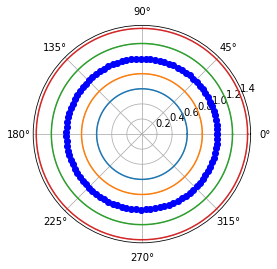

In [44]:
x = np.linspace(0, 2*pi, 100)
y1 = sin(x)**2+cos(x)**2
y2 = sin(x)**2+cos(x)**2-0.4
y3 = sin(x)**2+cos(x)**2-0.2
y4 = sin(x)**2+cos(x)**2+0.2
y5 = sin(x)**2+cos(x)**2+0.4
plt.polar(x, y1, 'bo', x, y2, x, y3, x, y4, x, y5)
plt.show()

- 3 Напишите код, который будет рисовать график прямой линии в полярных координатах.

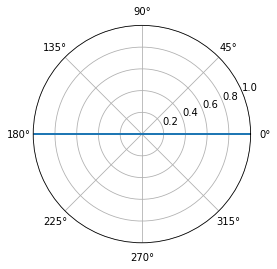

In [140]:
x = np.linspace(0, 8*pi, 9)
y1 = sin(x-pi)+1
plt.polar(x, y1)
plt.show()

### Задание 5

- 1 Решите систему уравнений:

$y=x^2-1 \\
exp(x)+x(1-y)=1$

C:\Users\Nickel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


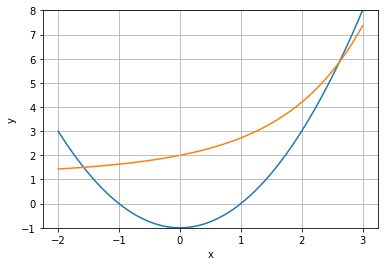

2.618145573085454 5.854686241866959


In [201]:
x = np.linspace(-2, 3, 201)
plt.plot(x, x**2 - 1)
plt.plot(x, (np.exp(x) + x - 1)/x)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1,8) 
plt.grid(True)
plt.show()



def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x - x*y - 1)

x1, y1 =  fsolve(equations, (3, 3))
              
print (x1, y1)

- 2 Решите систему уравнений и неравенств:

$y=x^2-1 \\
exp(x)+x(1-y)>1$

In [202]:
def equations2(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x - x*y > 1)

x1, y1 =  fsolve(equations2, (0, 0))
              
print (x1, y1)

-7.216800630079581e-36 -1.0
